In [138]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [139]:
data = pd.read_csv("CombinedData.csv")
print(data.columns)

Index(['Unnamed: 0', 'LOCATION_NAME', 'SAMPLE.COLLECTION.TIME',
       'DOSE.EQUIVALENT.RATE..nSv.h.', 'GAMMA.COUNT.RATE.R02..CPM.',
       'GAMMA.COUNT.RATE.R03..CPM.', 'GAMMA.COUNT.RATE.R04..CPM.',
       'GAMMA.COUNT.RATE.R05..CPM.', 'GAMMA.COUNT.RATE.R06..CPM.',
       'GAMMA.COUNT.RATE.R07..CPM.', 'GAMMA.COUNT.RATE.R08..CPM.',
       'GAMMA.COUNT.RATE.R09..CPM.', 'STATUS'],
      dtype='object')


In [141]:
data.columns
data.dropna()

numerical_features = ['DOSE.EQUIVALENT.RATE..nSv.h.', 'GAMMA.COUNT.RATE.R02..CPM.',
       'GAMMA.COUNT.RATE.R03..CPM.', 'GAMMA.COUNT.RATE.R04..CPM.',
       'GAMMA.COUNT.RATE.R05..CPM.', 'GAMMA.COUNT.RATE.R06..CPM.',
       'GAMMA.COUNT.RATE.R07..CPM.', 'GAMMA.COUNT.RATE.R08..CPM.',
       'GAMMA.COUNT.RATE.R09..CPM.']

cat_columns = ['SAMPLE.COLLECTION.TIME', 'STATUS']

In [115]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Unnamed: 0', 'LOCATION_NAME', 'SAMPLE.COLLECTION.TIME',
       'DOSE.EQUIVALENT.RATE..nSv.h.', 'GAMMA.COUNT.RATE.R02..CPM.','STATUS'])
X.dropna()


,GAMMA.COUNT.RATE.R03..CPM.,GAMMA.COUNT.RATE.R04..CPM.,GAMMA.COUNT.RATE.R05..CPM.,GAMMA.COUNT.RATE.R06..CPM.,GAMMA.COUNT.RATE.R07..CPM.,GAMMA.COUNT.RATE.R08..CPM.,GAMMA.COUNT.RATE.R09..CPM.
0,-3.466850,-3.370213,-0.664677,3.961296,0.400123,-4.112204,-2.005568
1,-3.512424,-3.401256,-0.687944,4.040501,0.290972,-4.164586,-1.818178
2,-3.535211,-3.385735,-0.781013,3.882092,0.400123,-4.164586,-1.818178
3,-3.554201,-3.385735,-0.687944,3.882092,0.290972,-4.112204,-1.818178
4,-3.550403,-3.401256,-0.734479,4.000899,0.254588,-4.112204,-1.818178
...,...,...,...,...,...,...,...
122798,-0.622265,-0.809188,-0.432006,-0.038518,0.327355,2.226058,-2.192957
122799,-0.588085,-0.716060,-0.362204,-0.038518,0.363739,2.068911,-2.192957
122800,-0.569095,-0.778146,-0.432006,0.001084,0.509273,2.121294,-2.192957
122801,-0.656446,-0.762624,-0.478540,0.119891,0.363739,2.016529,-2.192957


In [142]:
# convert collection time

# "05/21/2008 17:41:00"
#data['']
data['SAMPLE.COLLECTION.TIME'] = pd.to_datetime(data['SAMPLE.COLLECTION.TIME'])
data['hour'] = data['SAMPLE.COLLECTION.TIME'].dt.hour
data['day_of_week'] = data['SAMPLE.COLLECTION.TIME'].dt.dayofweek
data['month'] = data['SAMPLE.COLLECTION.TIME'].dt.month_name
data['day'] = data['SAMPLE.COLLECTION.TIME'].dt.day_name
data = data.drop(columns=['SAMPLE.COLLECTION.TIME'])



# convert status to binary 'APPROVED' = 1, other statuses = 0)
data['STATUS'] = data['STATUS'].apply(lambda x: 1 if x == 'APPROVED' else 0)


numeric_columns = ['DOSE.EQUIVALENT.RATE..nSv.h.', 'GAMMA.COUNT.RATE.R02..CPM.',
       'GAMMA.COUNT.RATE.R03..CPM.', 'GAMMA.COUNT.RATE.R04..CPM.',
       'GAMMA.COUNT.RATE.R05..CPM.', 'GAMMA.COUNT.RATE.R06..CPM.',
       'GAMMA.COUNT.RATE.R07..CPM.', 'GAMMA.COUNT.RATE.R08..CPM.',
       'GAMMA.COUNT.RATE.R09..CPM.']



# convert numeric columns to proper numeric types
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [117]:
data.columns

Index(['Unnamed: 0', 'LOCATION_NAME', 'DOSE.EQUIVALENT.RATE..nSv.h.',
       'GAMMA.COUNT.RATE.R02..CPM.', 'GAMMA.COUNT.RATE.R03..CPM.',
       'GAMMA.COUNT.RATE.R04..CPM.', 'GAMMA.COUNT.RATE.R05..CPM.',
       'GAMMA.COUNT.RATE.R06..CPM.', 'GAMMA.COUNT.RATE.R07..CPM.',
       'GAMMA.COUNT.RATE.R08..CPM.', 'GAMMA.COUNT.RATE.R09..CPM.', 'STATUS',
       'hour', 'day_of_week', 'month', 'day'],
      dtype='object')

In [143]:
combined_data_imputed.columns

Index(['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7',
       'num_8', 'cat_0', 'cat_1', 'cat_2'],
      dtype='object')

Shape of transformed data: (122803, 12)
Linear Model: 
MSE: 4.840359828546054e-25

Lasso Model: 
MSE: 7.180069407895484e-10

Ridge Model:
MSE: 1.2819116582333456e-25

Elastic Net: 
MSE: 7.18294960316936e-10

Random Forest: 
MSE: 0.0007038547522713427

Gradient Boosting:
MSE: 0.0002850671316569502

Support Vector Regression: 
MSE: 2.930346055101234e-06

KNN: 
MSE: 2.631810681302738

Evaluating Linear Regression:
R-squared: 1.000000
Mean Squared Error (MSE): 0.000000
Mean Absolute Error (MAE): 0.000000
--------------------------------------------------
Evaluating Lasso Regression:
R-squared: 1.000000
Mean Squared Error (MSE): 0.000000
Mean Absolute Error (MAE): 0.000007
--------------------------------------------------
Evaluating Ridge Regression:
R-squared: 1.000000
Mean Squared Error (MSE): 0.000000
Mean Absolute Error (MAE): 0.000000
--------------------------------------------------
Evaluating Elastic Net Regression:
R-squared: 1.000000
Mean Squared Error (MSE): 0.000000
Mean Absolu

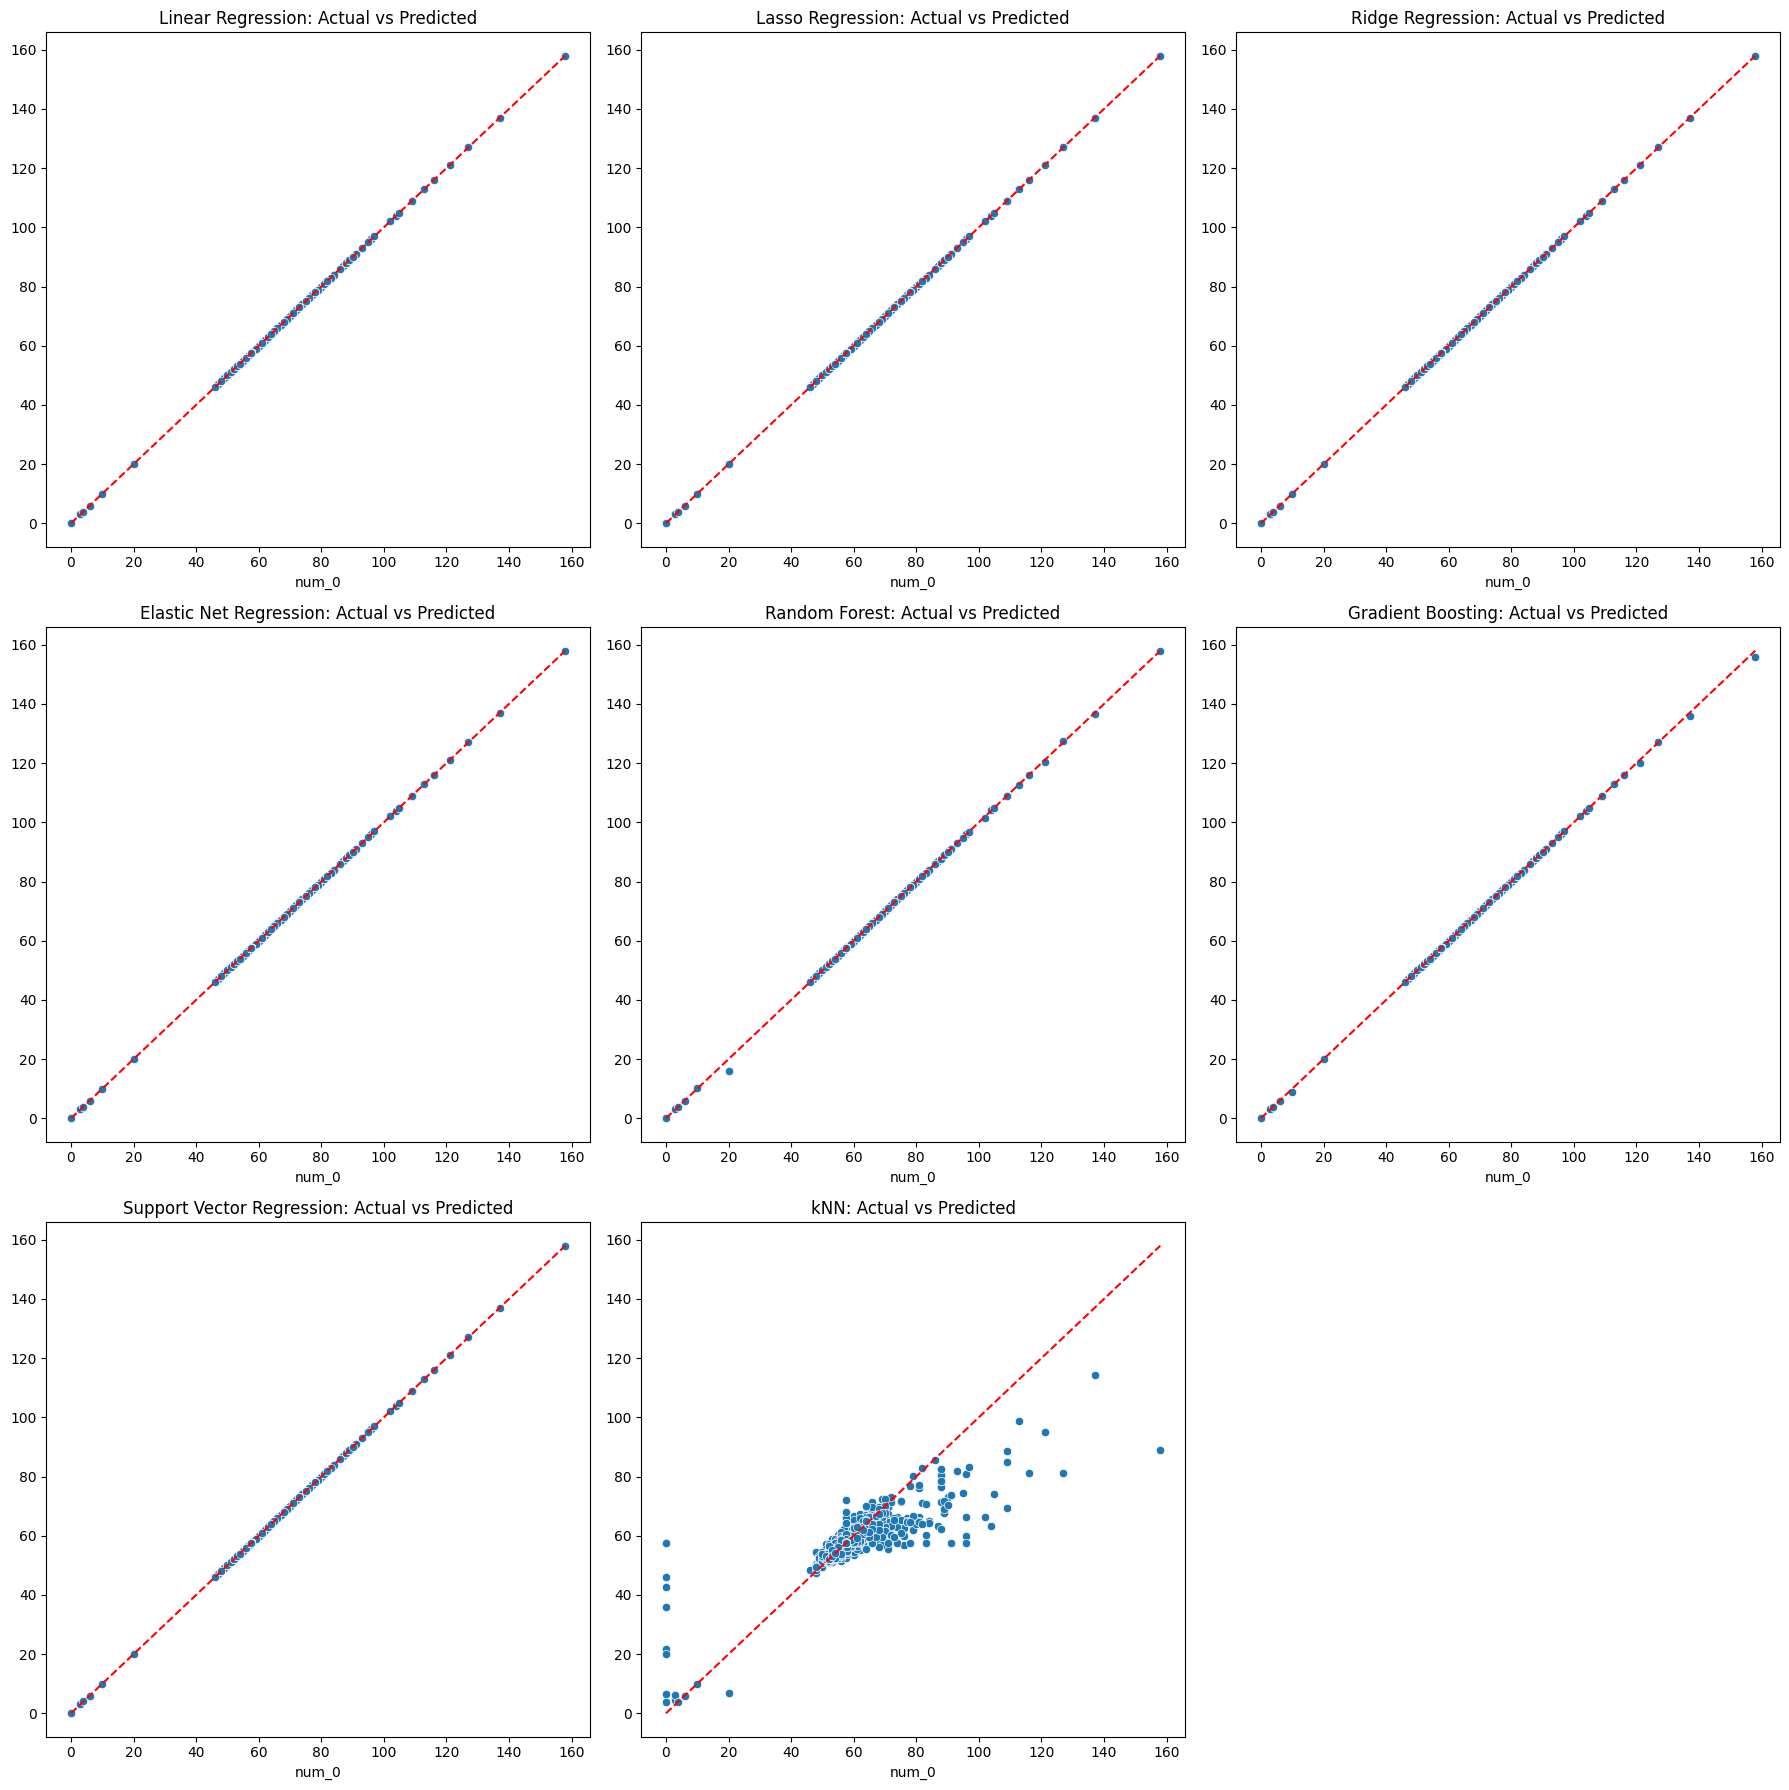

In [ ]:
## num_0/dose


# define transformers for numeric and categorical columns
numeric_transformer = SimpleImputer(strategy='mean')  
categorical_transformer = SimpleImputer(strategy='most_frequent')  

# combine 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  
        ('cat', categorical_transformer, data.select_dtypes(include=['object']).columns)  
    ])

# apply transformations 
transformed_data = preprocessor.fit_transform(data)

print(f"Shape of transformed data: {transformed_data.shape}")


numeric_transformed_cols = [f"num_{i}" for i in range(len(numeric_columns))]
categorical_transformed_cols = [f"cat_{i}" for i in range(len(data.select_dtypes(include=['object']).columns))]
all_columns = numeric_transformed_cols + categorical_transformed_cols

combined_data_imputed = pd.DataFrame(transformed_data, columns=all_columns)


X = combined_data_imputed[numeric_transformed_cols]
y = combined_data_imputed['num_0']

# split the data into training and testing sets, 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_coeff = linear_model.coef_
linear_int = linear_model.intercept_

print(f'Linear Model: ')
#print(f'Y Pred: {y_pred_linear}\n')
print(f'MSE: {linear_mse}\n')
#print(f'Coefficient: {linear_coeff}\n')
#print(f'Intercept: {linear_int}\n')



# Lasso
lasso = Lasso(alpha=0.000001)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_coeff = lasso.coef_
lasso_int = lasso.intercept_

print(f'Lasso Model: ')
#print(f'Y Pred: {lasso_pred}\n')
print(f'MSE: {lasso_mse}\n')
#print(f'Coefficient: {lasso_coeff}\n')
#print(f'Intercept: {lasso_int}\n')


# ridge
ridge = Ridge(alpha=0) # can this be zero?
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_coeff = ridge.coef_
ridge_int = ridge.intercept_

print(f'Ridge Model:')
#print(f'Y Pred: {ridge_pred}\n')
print(f'MSE: {ridge_mse}\n')
#print(f'Coefficient: {ridge_coeff}\n')
#print(f'Intercept: {ridge_int}\n')



# elastic net
elastic_net = ElasticNet(alpha=0.000001, l1_ratio=0.9)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_coeff = elastic_net.coef_
elastic_int = elastic_net.intercept_

print(f'Elastic Net: ')
#print(f'Y Pred: {elastic_net_pred}\n')
print(f'MSE: {elastic_net_mse}\n')
#print(f'Coefficient: {elastic_coeff}\n')
#print(f'Intercept: {elastic_int}\n')


# random forest regressor
#rf_model = RandomForestRegressor(random_state=42)
rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split =5, n_estimators=100)
# Random Forest: 
#Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest: ')
#print(f'Y Pred: {y_pred_rf}\n')
print(f'MSE: {rf_mse}\n')



# gradient boosting regressor
#gb_model = GradientBoostingRegressor(random_state=42)
gb_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=6, min_samples_split=15, n_estimators=400)
#Best Params: {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_split': 15, 'n_estimators': 400}
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)

print(f'Gradient Boosting:')
#print(f'Y Pred: {y_pred_gb}\n')
print(f'MSE: {gb_mse}\n')


# support vector regression
#svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model= SVR(C=0.1, epsilon=0.01, kernel='linear')
# Best Params: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)

print(f'Support Vector Regression: ')
print(f'MSE: {svr_mse}\n')

# kNN
#knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model= KNeighborsRegressor(metric='minkowski', n_neighbors=5, weights='distance')
# Best Params: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)

print('KNN: ')
print(f"MSE: {knn_mse}\n")


# function to evaluate model
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluating {model_name}:")
    print(f"R-squared: {r2_score(y_true, y_pred):.6f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.6f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.6f}")
    print("-" * 50)

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Lasso Regression", y_test, lasso_pred)
evaluate_model("Ridge Regression", y_test, ridge_pred)
evaluate_model("Elastic Net Regression", y_test, elastic_net_pred)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)
evaluate_model("Support Vector Regressor", y_test, svr_pred)



plt.figure(figsize=(18, 18))

# linear
plt.subplot(3, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')

# Lasso 
plt.subplot(3, 3, 2)
sns.scatterplot(x=y_test, y=lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Lasso Regression: Actual vs Predicted')

# Ridge 
plt.subplot(3, 3, 3)
sns.scatterplot(x=y_test, y=ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Ridge Regression: Actual vs Predicted')


# elastic net
plt.subplot(3, 3, 4)
sns.scatterplot(x=y_test, y=elastic_net_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Elastic Net Regression: Actual vs Predicted')

# random forest
plt.subplot(3, 3, 5)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')

# gradient boosting
plt.subplot(3, 3, 6)
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting: Actual vs Predicted')

# SVR
plt.subplot(3, 3, 7)
sns.scatterplot(x=y_test, y=svr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Support Vector Regression: Actual vs Predicted')

# kNN
plt.subplot(3, 3, 8)
sns.scatterplot(x=y_test, y=knn_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('kNN: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [145]:
# hyperparameter tuning for lasso

param_grid = {'alpha': [0.000001, 0.00001, 0.0001,0.001]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print('Lasso: ')
print(f"Best alpha: {grid_search.best_params_['alpha']}\n") # 0.0001

# hyperparameter tuning for ridge
param_grid = {'alpha': [0, 0.000001, 0.00001, 0.0001]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Ridge: ")
print(f"Best alpha: {grid_search.best_params_['alpha']}\n") # as small as possible? can it be zero?

# hyperparameter tuning for elastic net
param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.001 ],'l1_ratio': [0.87, 0.88, 0.89, 0.9]} 
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Elastic Net: ")
print(f"Best alpha: {grid_search.best_params_['alpha']}") # 0.0001 same as lasso
print(f"Best l1_ratio: {grid_search.best_params_['l1_ratio']}\n") # 0.88





Lasso: 
Best alpha: 1e-06

Ridge: 
Best alpha: 0

Elastic Net: 
Best alpha: 1e-06
Best l1_ratio: 0.9



Evaluating Autoregressive Model:
R-squared: 0.646428
Mean Squared Error (MSE): 0.041453
Mean Absolute Error (MAE): 0.032506
--------------------------------------------------


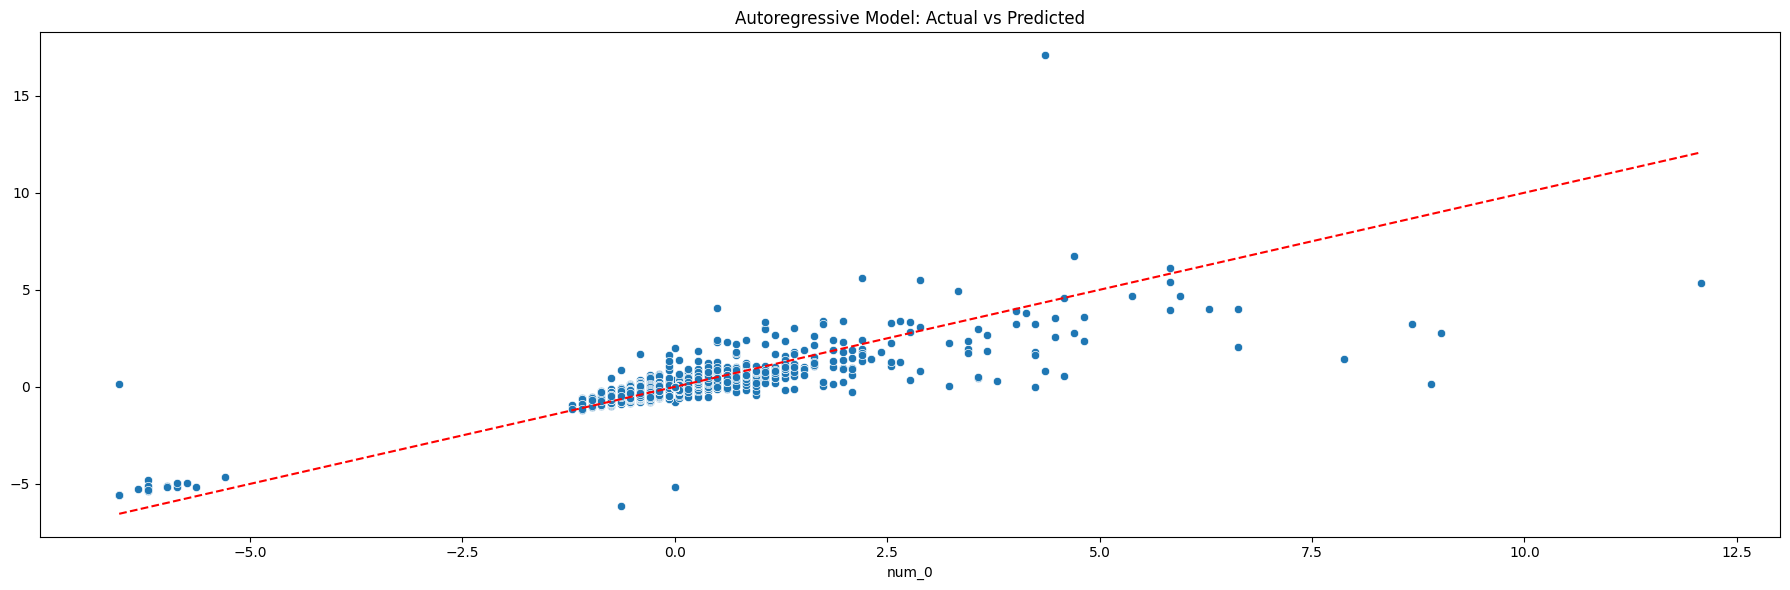

'\n# attempt at hyperparameter tuning \nparam_grid_arima = {\'p\': [0, 1], \n                 \'d\': [0,1], \n                 \'q\': [0,1]}\ngrid_search_arima = GridSearchCV(linear_model, param_grid_arima, cv=5, scoring=\'neg_mean_squared_error\')\ngrid_search_arima.fit(X_train, y_train)\nbest_arima = grid_search_arima.best_estimator_\n\nprint(f"Autoregressive Model: \nBest Params: {grid_search_arima.best_params_}\n")\n'

In [121]:
# autoregression for num_0/dose
# not a good model for dose

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


def create_lagged_features(data, target_column, lags):
    df_lagged = data.copy()
    for lag in range(1, lags + 1):
        df_lagged[f'{target_column}_lag_{lag}'] = df_lagged[target_column].shift(lag)
    df_lagged = df_lagged.dropna()  
    return df_lagged

# apply lag
lags = 3  #  3 values to predict the target
data_lagged = create_lagged_features(combined_data_imputed, 'num_0', lags)

lagged_columns = [f'num_0_lag_{i}' for i in range(1, lags + 1)]
X = data_lagged[lagged_columns]
y = data_lagged['num_0']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluating {model_name}:")
    print(f"R-squared: {r2_score(y_true, y_pred):.6f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.6f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.6f}")
    print("-" * 50)

evaluate_model("Autoregressive Model", y_test, y_pred_linear)


plt.figure(figsize=(18, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Autoregressive Model: Actual vs Predicted')
plt.tight_layout()
plt.show()

'''
# attempt at hyperparameter tuning 
param_grid_arima = {'p': [0, 1], 
                 'd': [0,1], 
                 'q': [0,1]}
grid_search_arima = GridSearchCV(linear_model, param_grid_arima, cv=5, scoring='neg_mean_squared_error')
grid_search_arima.fit(X_train, y_train)
best_arima = grid_search_arima.best_estimator_

print(f"Autoregressive Model: \nBest Params: {grid_search_arima.best_params_}\n")
'''


param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_ridge = grid_search.best_estimator_
print("Best Ridge alpha:", grid_search.best_params_['alpha'])

# Predict and evaluate
y_pred_ridge = best_ridge.predict(X_test)
evaluate_model("Tuned Ridge Autoregressive Model", y_test, y_pred_ridge)

In [ ]:
# hyperparameter tuning for random forest, do this again too
param_grid_rf = {'n_estimators': [200,250], # 100
                 'max_depth': [25], # 20, not 40
                 'min_samples_split': [20], # 5
                 'min_samples_leaf': [10,12]} # 1
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

print(f"Random Forest: \nBest Params: {grid_search_rf.best_params_}\n")



Random Forest: 
Best Params: {'max_depth': 25, 'min_samples_leaf': 12, 'min_samples_split': 20, 'n_estimators': 200}



In [ ]:
# hyperparameter tuning for gradient boost, need to run again
param_grid_gb = {'n_estimators': [200, 300, 400], # 100, 200, 300
                 'learning_rate': [0.01, 0.05, 0.1], # 0.01, 0.05, 0.1
                 'max_depth': [5,6], # 3, 4, 5
                 'min_samples_split': [10,15]} # 2,5,10
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print(f"Gradient Boosting: \nBest Params: {grid_search_gb.best_params_}")



In [ ]:
# hyperparameter tuning for SVR, ready to run again
param_grid_svr = {'C': [0.1,1],        # 0.1, 1, 10, 0.1
                  'epsilon': [0.0001, 0.001],      # [0.01, 0.1, 0.5], 0.001
                  'kernel': ['linear', 'rbf']} # linear
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_
print(f"SVR: \nBest Params: {grid_search_svr.best_params_}")



SVR: 
Best Params: {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}


In [ ]:
# hyperparameter tuning for K Neighbors, this is good?
param_grid_knn = {'n_neighbors': [11], # 3, 5, 7, 9 # 
                  'weights': ['uniform', 'distance'], # uniform
                  'metric': ['minkowski', 'euclidean']} # minkowski
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print(f"KNN: \nBest Params: {grid_search_knn.best_params_}")

KNN: 
Best Params: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
